In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import ValidationCurve

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.2

In [14]:
file_path = '/users/n/Downloads/Stars.csv'
df = pd.read_csv(file_path)
df.head()
#Type
# Red Dwarf - 0
# Brown Dwarf - 1
# White Dwarf - 2
# Main Sequence - 3
# Super Giants - 4
# Hyper Giants - 5

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [183]:
X.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
yellowish               2
Orange                  2
Whitish                 2
Pale yellow orange      1
Orange-Red              1
White-Yellow            1
Yellowish               1
Blue-White              1
Name: Color, dtype: int64

In [67]:
#Used One-hot encoder
X = df.drop(['Type'],axis =1)
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y)

model = KNeighborsClassifier()



cat_columns = X.select_dtypes(['object']).columns
num_columns = X.select_dtypes(exclude = ['object']).columns

enc = OneHotEncoder()

transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer,model)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

ValueError: Found unknown categories ['Orange-Red'] in column 0 during transform

In [180]:
X = df.drop(['Type'],axis =1)
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y)

model = KNeighborsClassifier()



cat_columns = X.select_dtypes(['object']).columns
num_columns = X.select_dtypes(exclude = ['object']).columns

enc = OneHotEncoder(handle_unknown ='ignore')

transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer,model)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7

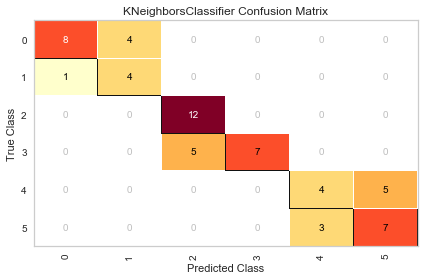

In [181]:
cm = ConfusionMatrix(pipe)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.finalize()

In [ ]:
def get_precision(cm):
    array = cm.confusion_matrix_
    for i in range(array.shape[0]):
        diag = array[i,i]
        rows = array[i,:]
        print("Precision For", i, diag / np.sum(rows))
        
def get_recall(cm):
    array = cm.confusion_matrix_
    for i in range(array.shape[0]):
        diag = array[i,i]
        col = array[:,i]
        print("Recall For", i, diag / np.sum(col))
    
get_precision(cm)

get_recall(cm)

In [189]:
from sklearn.metrics import classification_report


y_predicted = pipe.predict(X)
y_ground_truth = y

print(classification_report(y_ground_truth,y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        40
           1       0.76      0.70      0.73        40
           2       0.81      0.97      0.89        40
           3       0.91      0.75      0.82        40
           4       0.64      0.68      0.66        40
           5       0.69      0.62      0.66        40

    accuracy                           0.75       240
   macro avg       0.76      0.75      0.75       240
weighted avg       0.76      0.75      0.75       240



In [201]:
#Decision Tree Classifier for max_depth  = 4

dec = DecisionTreeClassifier(max_depth = 4)

enc = OneHotEncoder( handle_unknown ='ignore')

X_train,X_test,y_train,y_test = train_test_split(X,y)


transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer,dec)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.8

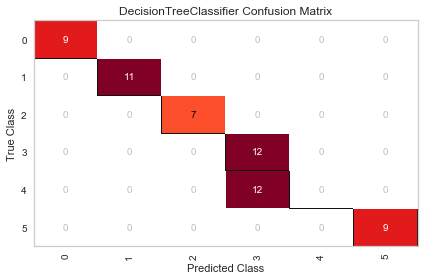

In [202]:
cm = ConfusionMatrix(pipe)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.finalize()

In [203]:
y_predicted = pipe.predict(X)
y_ground_truth = y

print(classification_report(y_ground_truth,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       0.50      1.00      0.67        40
           4       0.00      0.00      0.00        40
           5       1.00      1.00      1.00        40

    accuracy                           0.83       240
   macro avg       0.75      0.83      0.78       240
weighted avg       0.75      0.83      0.78       240



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
X_test.shape

(60, 6)

In [133]:
df.shape

(240, 7)

In [204]:
#decided to over sample
from imblearn.pipeline import make_pipeline
sampler = RandomOverSampler()

enc = OneHotEncoder( handle_unknown ='ignore')
dec = DecisionTreeClassifier(max_depth = 4)



transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer, sampler, dec)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9666666666666667

[Text(139.5, 489.24, 'A_M <= -7.515\ngini = 0.833\nsamples = 198\nvalue = [33, 33, 33, 33, 33, 33]'),
 Text(69.75, 380.52000000000004, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 0, 0, 0, 33]'),
 Text(209.25, 380.52000000000004, 'R <= 0.036\ngini = 0.8\nsamples = 165\nvalue = [33, 33, 33, 33, 33, 0]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33, 0, 0, 0]'),
 Text(279.0, 271.8, 'A_M <= 8.313\ngini = 0.75\nsamples = 132\nvalue = [33, 33, 0, 33, 33, 0]'),
 Text(139.5, 163.08000000000004, 'R <= 9.49\ngini = 0.5\nsamples = 66\nvalue = [0, 0, 0, 33, 33, 0]'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 0, 33, 0, 0]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 0, 0, 33, 0]'),
 Text(418.5, 163.08000000000004, 'A_M <= 15.495\ngini = 0.5\nsamples = 66\nvalue = [33, 33, 0, 0, 0, 0]'),
 Text(348.75, 54.360000000000014, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0, 0, 0]'),
 Text(488.25, 54.360000000000014, 'gin

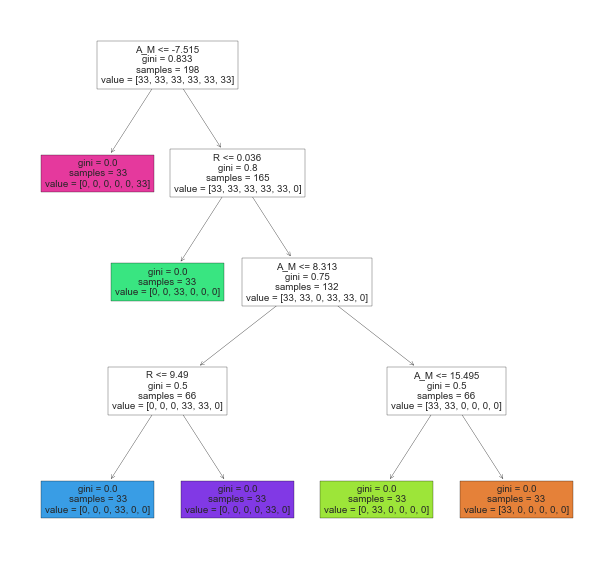

In [207]:
plt.figure(figsize = (10,10))
plot_tree(
    dec,
    feature_names = transformer.get_feature_names(),
    filled=True
)

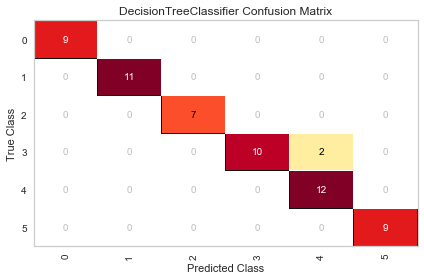

In [206]:
cm = ConfusionMatrix(pipe)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.finalize()

In [199]:
y_predicted = pipe.predict(X)
y_ground_truth = y

print(classification_report(y_ground_truth,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [218]:
#Decision Tree Classifier for max_depth  = 5

dec = DecisionTreeClassifier(max_depth = 5)

enc = OneHotEncoder( handle_unknown ='ignore')

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.4)


transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer,dec)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)



1.0

In [209]:
#decided to over sample max_depth  = 5
from imblearn.pipeline import make_pipeline
sampler = RandomOverSampler()

enc = OneHotEncoder( handle_unknown ='ignore')
dec = DecisionTreeClassifier(max_depth = 5)



transformer = make_column_transformer (
   (enc, cat_columns),
    remainder = 'passthrough'
)

pipe = make_pipeline(transformer, sampler, dec)

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.0

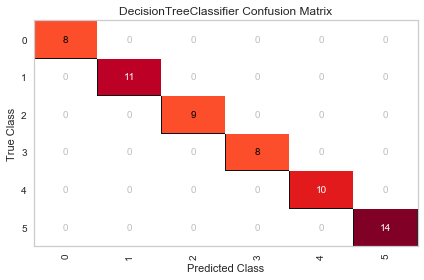

In [210]:
cm = ConfusionMatrix(pipe)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.finalize()

In [211]:
y_predicted = pipe.predict(X)
y_ground_truth = y

print(classification_report(y_ground_truth,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



[Text(418.5, 713.475, 'L <= 0.071\ngini = 0.833\nsamples = 192\nvalue = [32, 32, 32, 32, 32, 32]'),
 Text(251.10000000000002, 509.625, 'A_M <= 15.495\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32, 0, 0, 0]'),
 Text(167.4, 305.775, 'onehotencoder__x0_Red <= 0.5\ngini = 0.5\nsamples = 64\nvalue = [0, 32, 32, 0, 0, 0]'),
 Text(83.7, 101.92499999999995, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0, 0, 0]'),
 Text(251.10000000000002, 101.92499999999995, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0, 0, 0, 0]'),
 Text(334.8, 305.775, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0, 0, 0]'),
 Text(585.9, 509.625, 'R <= 11.3\ngini = 0.667\nsamples = 96\nvalue = [0, 0, 0, 32, 32, 32]'),
 Text(502.20000000000005, 305.775, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 32, 0, 0]'),
 Text(669.6, 305.775, 'R <= 486.5\ngini = 0.5\nsamples = 64\nvalue = [0, 0, 0, 0, 32, 32]'),
 Text(585.9, 101.92499999999995, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 32, 0]'),
 Text(753.3000000000001, 101.92

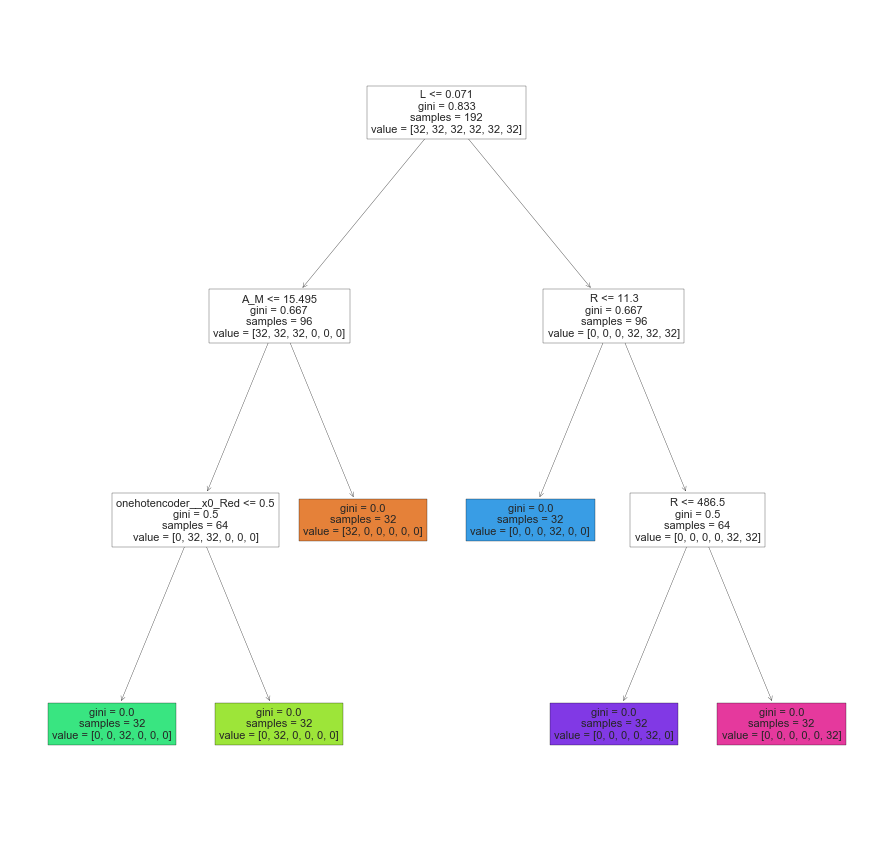

In [212]:
plt.figure(figsize = (15,15))
plot_tree(
    dec,
    feature_names = transformer.get_feature_names(),
    filled=True
)